Importing the Libraries

In [1]:
#numpy se utiliza para trabajar con matrices y vectores multidimensionales de manera eficiente.
import numpy as np
#pandas se utiliza para la manipulación y análisis de datos estructurados en tablas (dataframes).
import pandas as pd
#matplotlib y seaborn son bibliotecas para visualizar y trazar gráficos y diagramas.
import matplotlib.pyplot as plt
#
import seaborn as sns
#train_test_split se utiliza para dividir los datos en conjuntos de entrenamiento y prueba para su posterior evaluación.
from sklearn.model_selection import train_test_split
#RandomForestRegressor es una clase que se utiliza para construir un modelo de regresión aleatoria forestal.
from sklearn.ensemble import RandomForestRegressor
#metrics es un módulo que proporciona herramientas para evaluar el rendimiento del modelo.
from sklearn import metrics

Data Collection and Processing

In [2]:
# Este código utiliza la biblioteca pandas de Python para leer un archivo CSV llamado gld_price_data.csv que se encuentra en la ruta /content (posiblemente una carpeta o directorio). El archivo CSV contiene datos históricos de precios del oro (Gold) y se carga en un objeto pa
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# MUESTRA LAS 5 PRIMERAS FILAS 

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# IMPRIME LAS ULTIMAS 5 FILAS
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Este código devuelve la forma (shape) del DataFrame gold_data. La forma de un DataFrame es una tupla que indica el número de filas y columnas que contiene.
gold_data.shape

(2290, 6)

In [6]:
# head(): This method returns the first few rows of the DataFrame. By default, it returns the first 5 rows, but you can specify a different number by passing an integer as an argument. For example, gold_data.head(10) would return the first 10 rows of gold_data.
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# MOSTRAR NUMEROS NULLOS EN SUMA
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# DESCRIBE O RESUMEN VALORES DE LA DATA GOLD?DATA
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
#Este código calcula la matriz de correlación de Pearson de un DataFrame llamado gold_data utilizando el método corr() de la biblioteca pandas.
correlation = gold_data.corr()

<AxesSubplot:>

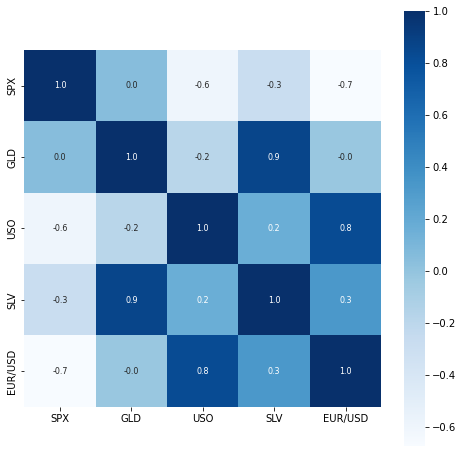

In [10]:
# MOSTRAR UN  heatmap PARA DDETALLLAR CORRELATION
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
#  VALORES DE CORRELACION GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

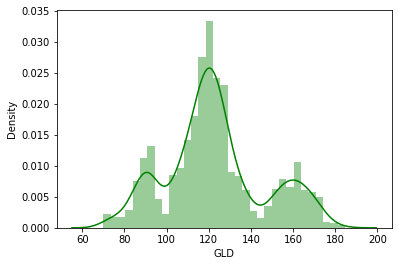

In [12]:
# MOSTRAR LA DISTRIBUCION DEL PRECIO DE GLD
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [13]:
#Este código divide el conjunto de datos gold_data en dos conjuntos, X y Y, para su uso en el modelado de aprendizaje automático.
#La variable X se crea eliminando dos columnas del DataFrame gold_data utilizando el método drop(): la columna 'Date' y la columna 'GLD'. La opción axis=1 indica que se eliminan columnas, y axis=0 se utiliza para eliminar filas. La columna 'Date' generalmente no se incluye en el modelado, ya que no es una variable que influya en el precio del oro, mientras que la columna 'GLD' se utiliza como la variable objetivo o de salida del modelo.
#La variable Y se crea seleccionando la columna 'GLD' del DataFrame gold_data. Esta columna contiene el precio del oro, que es la variable objetivo o de salida del modelo de aprendizaje automático. La variable Y se utilizará para entrenar el modelo y para evaluar su precisión y capacidad predictiva.

X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
#La variable X es un DataFrame de pandas que contiene las variables predictoras o de entrada del modelo de aprendizaje automático. En este caso, X se crea eliminando dos columnas del DataFrame gold_data: la columna 'Date' y la columna 'GLD'.
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
#La variable X es un DataFrame de pandas que contiene las variables predictoras o de entrada del modelo de aprendizaje automático. En este caso, X se crea eliminando dos columnas del DataFrame gold_data: la columna 'Date' y la columna 'GLD'.
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [16]:
#Este código divide los datos en conjuntos de entrenamiento y prueba para su uso en un modelo de aprendizaje automático utilizando el método train_test_split() de la biblioteca sklearn (Scikit-learn).
#Los datos se dividen en cuatro variables:

#X_train: el conjunto de datos de entrada para el conjunto de entrenamiento.
#X_test: el conjunto de datos de entrada para el conjunto de prueba.
#Y_train: el conjunto de datos de salida (o variable objetivo) para el conjunto de entrenamiento.
#Y_test: el conjunto de datos de salida (o variable objetivo) para el conjunto de prueba.

#Los parámetros utilizados en el método train_test_split() son:

#X y Y: los datos de entrada y salida a dividir en conjuntos de entrenamiento y prueba.
#test_size: la proporción del conjunto de datos que se utilizará para el conjunto de prueba. En este caso, se utiliza test_size=0.2, lo que significa que el 20% de los datos se utilizarán para el conjunto de prueba y el 80% restante se utilizará para el conjunto de entrenamiento.
#random_state: el valor utilizado para inicializar el generador de números aleatorios, que se utiliza para garantizar que se obtengan los mismos resultados cada vez que se ejecuta el código. El valor de random_state se establece en 2 en este caso, pero puede ser cualquier número entero arbitrario.


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [17]:
#Este código crea un modelo de regresión de bosques aleatorios utilizando la biblioteca sklearn (Scikit-learn).
#RandomForestRegressor es una clase en sklearn que se utiliza para construir modelos de regresión de bosques aleatorios. En este caso, se crea un objeto regressor utilizando RandomForestRegressor y se especifica que el modelo debe tener 100 árboles de decisión utilizando el parámetro n_estimators=100.

regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# training the model
#Este código entrena el modelo de regresión de bosques aleatorios regressor utilizando los conjuntos de entrenamiento X_train e Y_train.
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [19]:
# prediction on Test Data
#El método predict() es un método de la clase RandomForestRegressor que se utiliza para hacer predicciones en nuevos datos de entrada. En este caso, se proporciona el conjunto de prueba X_test como argumento al método predict()
test_data_prediction = regressor.predict(X_test)

In [20]:
#Este código imprime las predicciones realizadas por el modelo de regresión de bosques aleatorios en el conjunto de prueba X_test.
print(test_data_prediction)

[168.36889942  81.8270001  115.9488002  127.7910011  120.66140126
 154.76579752 150.21159875 126.15320043 117.55299878 125.9066008
 116.82140092 172.30010102 140.99279863 167.54209809 115.21030003
 117.68820028 139.71870301 170.17840127 159.55230266 153.86619906
 155.1735006  125.04200051 176.06749899 157.5635036  125.27490023
  93.82329972  77.7695001  120.78640032 119.09399954 167.52919937
  88.26240092 125.17700012  90.98650064 117.62899996 121.16069927
 135.9765006  115.34950148 115.28430085 149.15799953 107.02260113
 103.74110252  87.22639782 126.55190023 117.7922998  153.49219881
 119.83329984 108.3034     108.02359837  93.0966003  126.97409801
  74.69780031 113.50029931 121.21860016 111.21069878 118.89449897
 120.76509952 158.70130086 168.93120102 146.80459682  86.22689889
  94.12280002  87.05439859  90.52000042 119.07110067 126.49550062
 127.77450039 170.76429974 122.30569931 117.37459867  99.0553003
 167.74000157 142.98499853 132.0853022  121.22900233 121.54059915
 119.7991006

In [21]:
# R squared error
#VEste código calcula el coeficiente de determinación (R^2) entre las verdaderas salidas del conjunto de prueba Y_test y las predicciones realizadas por el modelo de regresión de bosques aleatorios en el conjunto de prueba test_data_prediction.
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9885300583962504



Compare los valores reales y los valores predichos en un gráfico
---



In [22]:

#Y_test es la variable que contiene las salidas verdaderas correspondientes al conjunto de prueba X_test. Al convertirla en una lista, se convierte en una estructura de datos iterable que se puede utilizar para realizar cálculos o generar gráficos, por ejemplo, para comparar los valores verdaderos con las predicciones realizadas por el modelo.

Y_test = list(Y_test)

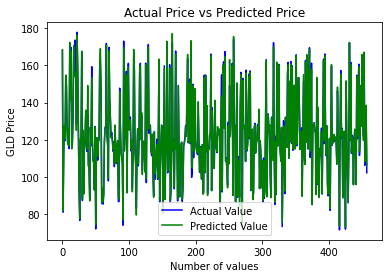

In [23]:

#Este código genera una gráfica que compara los valores reales (en azul) con los valores predichos (en verde) por el modelo de regresión de bosques aleatorios.
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()